# EE386 Lab Experiments
### Experiment 6

In [2]:
# Importing necessary libraries and modules
import numpy as np
import IPython
import scipy
import math
import control
import matplotlib
from scipy import signal as sp
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy.io import wavfile


In [3]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 10})

pi = np.pi

In [4]:
#Roll number: 191EE238
alpha = 1 + 238 % 3  
print(alpha)

2


#### Problem 1

Given:<br>
                The passband edge frequency is 10Hz.<br>
                The Passband gain is -2dB.<br>
                The Stopband frequency is 20Hz.<br>
                The Stopband gain is -40dB.<br>
                Sampling frequency is 720 samples/sec.<br>


In [5]:
wp = 2*pi*10
ws = 2*pi*20

Pg = alpha
Ps = 40
Fs = 720

G = 10**(-2/20)                        #Pg = 20*log(base10)(G)
S = 10**(-40/20)                       #Ps = 20*log(base10)(S)
eps = np.sqrt( (1-G**2)/G**2 )

print("Passband gain: {}\nStopband gain: {}\nEpsilon: {}".format(G,S,eps))

Passband gain: 0.7943282347242815
Stopband gain: 0.01
Epsilon: 0.7647831015792081


$\delta_p = 0.7943 ,$<br>
$\delta_s = 0.01$<br>

Thus, $\epsilon = \sqrt{\frac{1 - \delta_p^2}{\delta_p^2}} = 0.76478$

Now, Performing Pre warping process:

In [6]:
omega_p=wp/Fs
omega_s=ws/Fs
Omega_p1=(2*Fs)*np.tan(omega_p/2)
Omega_s1=(2*Fs)*np.tan(omega_s/2)
print("Pre warped passband and stop band frequencies:{} rad/s and {} rad/s".format(Omega_p1,Omega_s1))

Pre warped passband and stop band frequencies:62.87175778825736 rad/s and 125.98367547733056 rad/s


In [7]:
N, Omega_c=sp.buttord(Omega_p1, Omega_s1, Pg, Ps , analog=True)
n, d = sp.butter(N, Omega_c, btype='low', analog=True, output='ba')
num, den =sp.bilinear(n, d, fs=Fs)
print("Order of the filter:",N)
print("Cut off frequency:",Omega_c)

Order of the filter: 8
Cut off frequency: 65.01496262829536


Thus, For Order N =8, $D(s) = (s^2 + 0.3902s + 1)(s^2 + 1.1111s + 1)(s^2 + 1.6629s + 1)(s^2 + 1.9616s + 1).$

After LP -> LP transformation and after bilinear transformation:

In [8]:
print('H(z) = {}'.format(control.TransferFunction(n, d, dt=True)))

H(z) = 
                                                       3.192e+14
------------------------------------------------------------------------------------------------------------------------
z^8 + 333.3 z^7 + 5.553e+04 z^6 + 6.004e+06 z^5 + 4.59e+08 z^4 + 2.538e+10 z^3 + 9.922e+11 z^2 + 2.517e+13 z + 3.192e+14



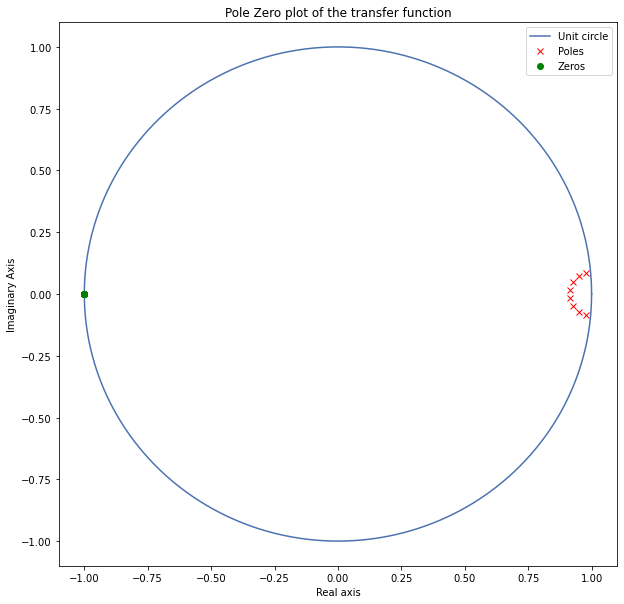

In [9]:
#Pole zero Plot
#zeros, poles, gain =sp.tf2zpk(num, denom)
z,p,k = sp.butter(N, Omega_c, btype='low', analog=True, output='zpk')
zeros,poles,gain =sp.bilinear_zpk(z,p,k, fs=Fs)
theta = np.arange(0,2*pi, 0.0001)

def pole_zero_plot(pole,zero):
    plt.plot(np.cos(theta),np.sin(theta),label = "Unit circle")
    plt.plot(np.real(pole),np.imag(pole),'rx',label = "Poles")
    plt.plot(np.real(zero),np.imag(zero),'go',label = "Zeros")
    plt.xlabel("Real axis")
    plt.ylabel("Imaginary Axis")
    plt.title("Pole Zero plot of the transfer function")
    plt.legend(loc = 'upper right')
    plt.tick_params(axis = 'both')
    
    
plt.figure(figsize = (10,10))
pole_zero_plot(poles, zeros)
plt.savefig('Experiment-6/Results/zpk_plot.png')

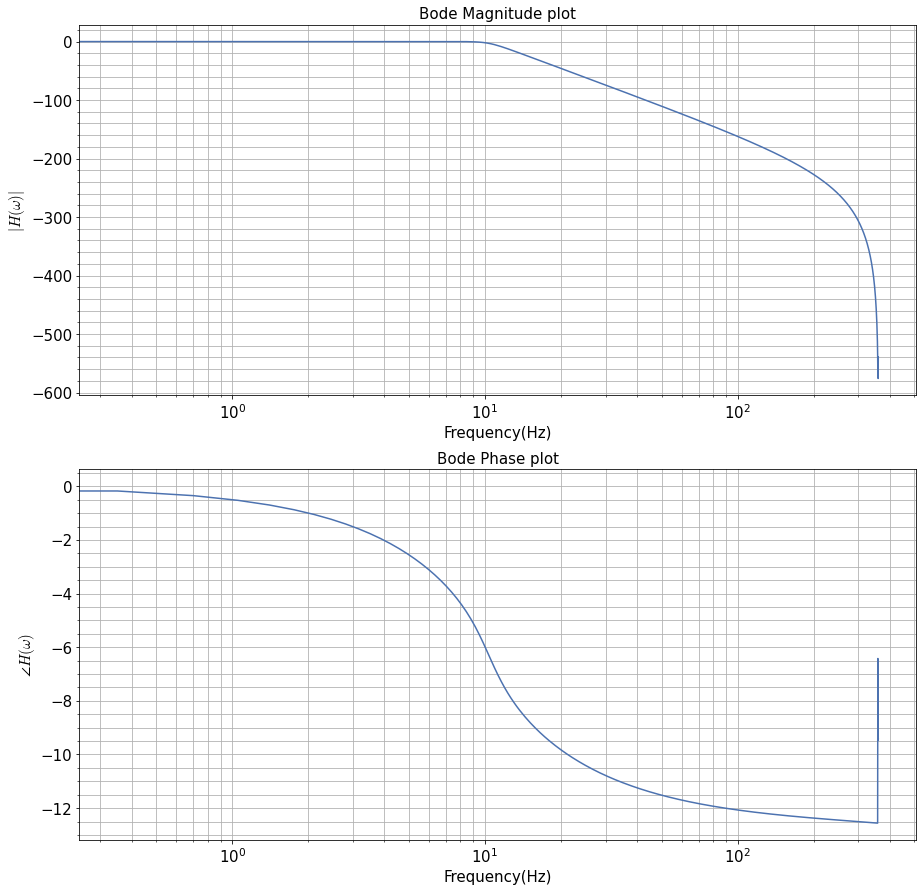

In [10]:
freq, mag = sp.freqz(num, den, 1024)
fig, axs = plt.subplots(2, figsize = (15,15))
title = ['$Bode\ Magnitude\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$', '$Bode\ Phase\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$']
def plot_bode(frequency, mag,title=None,x_label=None,y_label=None,row= None):
    
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), 20*np.log10(np.abs(mag)))
    else:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), np.unwrap(np.angle(mag))) 

    axs[row].set_title(title, fontsize = 15)
    axs[row].set_xlabel(x_label, fontsize = 15)
    axs[row].set_ylabel(y_label, fontsize = 15)
    axs[row].tick_params(axis="both", labelsize = 15)
    
plot_bode(freq,mag,title = "Bode Magnitude plot", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)

plt.savefig("Experiment-6/Results/Bode_butter")

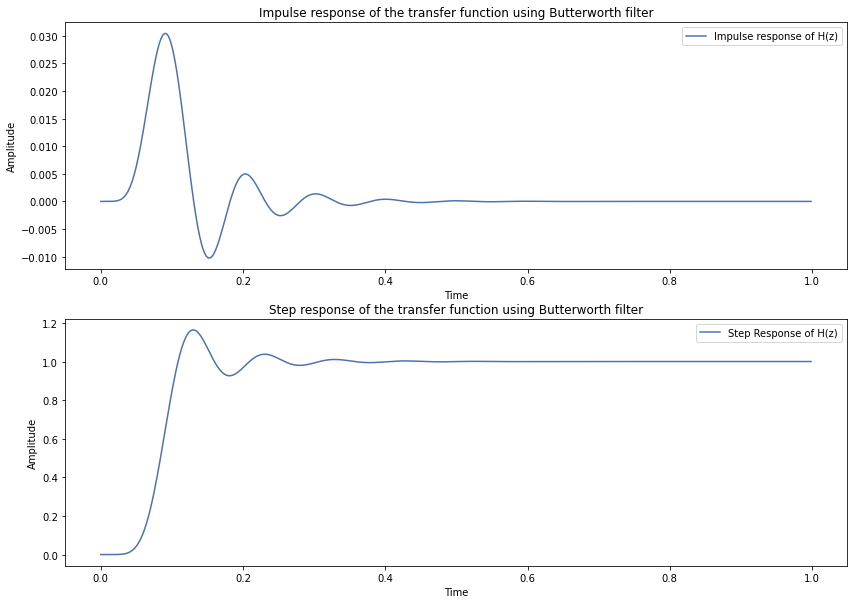

In [11]:
#Impulse and step response
t = np.arange(0, 1, 1/Fs)
impulse = np.hstack((np.array([1]),np.zeros(Fs - 1)))
step = np.ones(Fs)

y1=sp.lfilter(num, den, impulse)
y2=sp.lfilter(num, den, step)

plt.figure(figsize= (14,10))
plt.subplot(2,1,1)
plt.plot(t,y1,label = "Impulse response of H(z)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper right')
plt.title("Impulse response of the transfer function using Butterworth filter")

plt.subplot(2,1,2)
plt.plot(t,y2,label = "Step Response of H(z)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper right')
plt.title("Step response of the transfer function using Butterworth filter")

plt.savefig("Experiment-6/Results/ISresponse_butter")

#### Problem 2

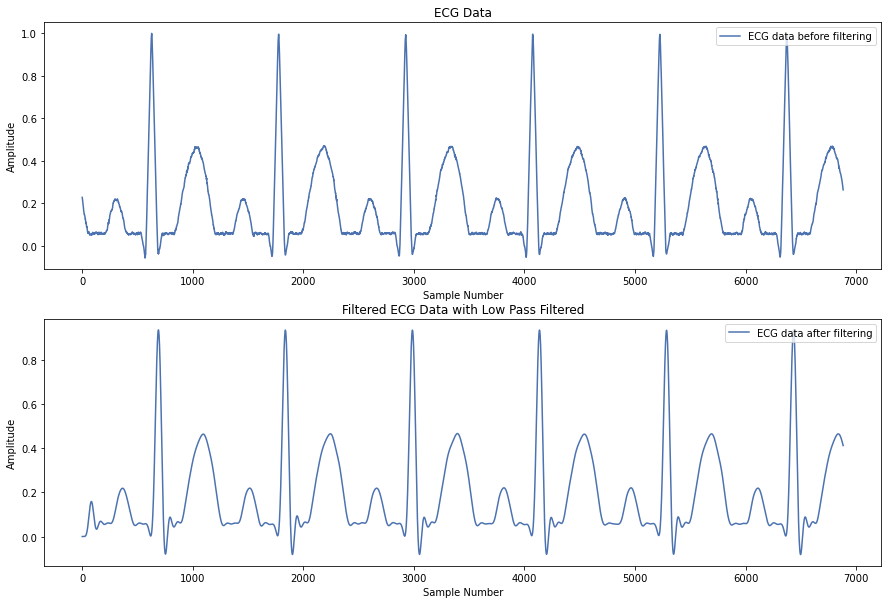

In [12]:
#Filtering 
ecg = np.loadtxt("Experiment-6/ECG_Data.txt")
ecg_filtered = sp.lfilter(num, den, ecg)

plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
plt.plot(ecg,label = "ECG data before filtering")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("ECG Data")
plt.legend(loc = 'upper right')
plt.subplot(2,1,2)
plt.plot(ecg_filtered,label = "ECG data after filtering")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper right')
plt.title("Filtered ECG Data with Low Pass Filtered")

plt.savefig("Experiment-6/Results/ECG_data")

In [13]:
def plot_mag(x, Fs,norm = True, max_freq=None,Title = None, interpolate = True):
    
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
        
    X = (np.abs(np.fft.fft(x)[0:C]))
    N = Fs * np.arange(0, C) / len(x)
    
    X_norm = X
    if norm:
        X_norm = (1/C) * X;
    if interpolate:
        plt.plot(N, X_norm)
    else:
        plt.stem(N, X_norm)
    if Title:
            plt.title(Title)
        
    return N, X_norm

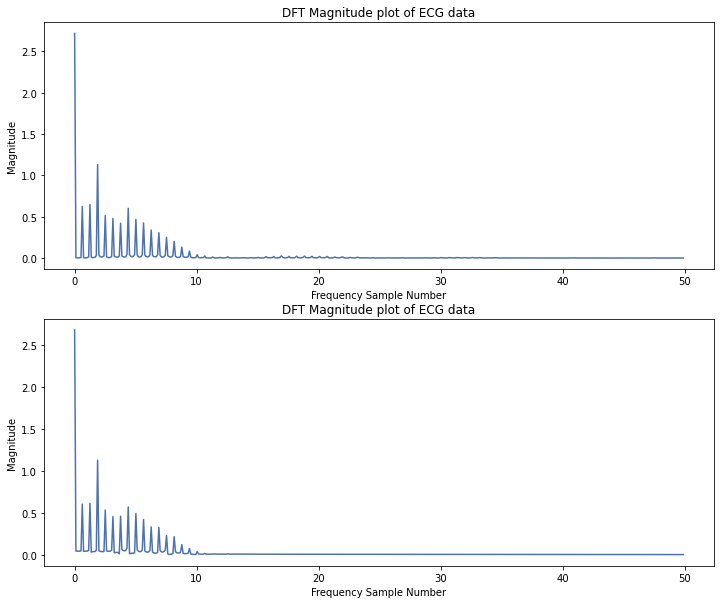

In [14]:
plt.figure(figsize = (12,10))
plt.subplot(2,1,1)
_,_ = plot_mag(ecg, Fs,max_freq = 50, norm = True,Title = "DFT Magnitude plot of ECG data")
plt.xlabel("Frequency Sample Number")
plt.ylabel("Magnitude")
plt.subplot(2,1,2)
_,_ = plot_mag(ecg_filtered, Fs,max_freq = 50, norm = True,Title = "DFT Magnitude plot of ECG data")
plt.xlabel("Frequency Sample Number")
plt.ylabel("Magnitude")

plt.savefig("Experiment-6/Results/ECG_DFT")

#### Problem 3

In [15]:
def plot_spectro(x, Fs, Window,samples, Nperseg, Noverlap):
    
    ft, tx, Sx = sp.spectrogram(x,Fs, window = Window,nperseg = Nperseg, noverlap = Noverlap)
    
    if samples:
        plt.pcolormesh(tx[0:samples],ft[0:samples], Sx[0:samples][0:samples], shading = 'gouraud')
    else:
        plt.pcolormesh(tx,ft,Sx, shading = 'gouraud')
        
    cbar = plt.colorbar()
    cbar.set_label('Amplitude')
    cbar.minorticks_on()
    plt.xlabel("Time(sec)")
    plt.ylabel("Frequency(Hz)")
    
    return tx,ft,Sx

In [16]:
Fs_instru, track= wavfile.read('Experiment-6/instru2.wav')
track = track/32767.0
print('Sampling rate of instrument : {}Hz'.format(Fs_instru))
print('Size of instrument signal: {}'.format(track.shape))
IPython.display.Audio(track, rate = Fs_instru)

Sampling rate of instrument : 11025Hz
Size of instrument signal: (39500,)


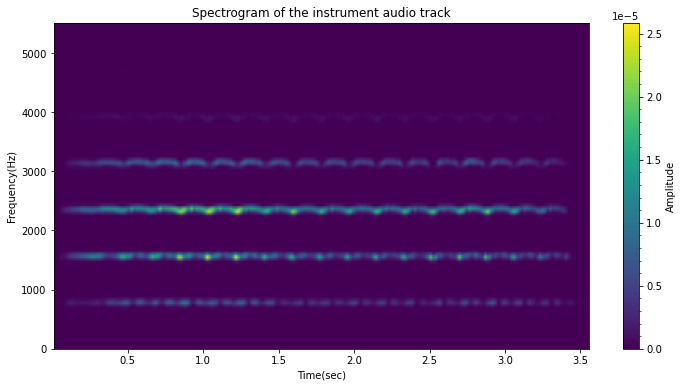

In [17]:
t,f,S = plot_spectro(track, Fs = Fs_instru, Window = 'hanning',samples = None,Nperseg = 200,Noverlap = 10)
plt.title("Spectrogram of the instrument audio track")

plt.savefig("Experiment-6/Results/Spectro_track")

In [18]:
peak, _= sp.find_peaks(S[:,10],threshold = 1e-8)
print("Frequencies present:",f[peak])

Frequencies present: [ 771.75  1598.625 2370.375 3142.125 3913.875]


Now, in order to design a Butterwirth filter capable of extracting/filtering out the fundamental peak we choose the specifications of the filter to be as follows: <br>
Pass band frequencies: F1 = 500Hz and F2 = 1000Hz,<br> 
Stop band frequencies:40dB attenuation at 250 Hz and 1250 Hz<br>

In [19]:
wp1 = 2*pi*500
wp2 = 2*pi*1000
ws1 = 2*pi*250
ws2 = 2*pi*1250

Pg = 3
Ps = 40
Fs = 11025


G = 10**(-Pg/20)                       #Pg = 20*log(base10)(G)
S = 10**(-Ps/20)                       #Ps = 20*log(base10)(S)

eps = np.sqrt( (1-G**2)/G**2 )

print("Passband gain: {}\nStopband gain: {}\nEpsilon: {}".format(G,S,eps))

Passband gain: 0.7079457843841379
Stopband gain: 0.01
Epsilon: 0.9976283451109835


In [20]:
omega_p1=wp1/Fs
omega_p2=wp2/Fs
omega_s1=ws1/Fs
omega_s2=ws2/Fs
Omega_p1=(2*Fs)*np.tan(omega_p1/2)
Omega_s1=(2*Fs)*np.tan(omega_s1/2)
Omega_p2=(2*Fs)*np.tan(omega_p2/2)
Omega_s2=(2*Fs)*np.tan(omega_s2/2)
print("Pre warped pass band frequencies are:{} rad/s and {} rad/s".format(Omega_p1,Omega_p2))
print("Pre warped stop band frequencies are:{} rad/s and {} rad/s".format(Omega_s1,Omega_s2))

Pre warped pass band frequencies are:3163.024139153343 rad/s and 6458.95598052781 rad/s
Pre warped stop band frequencies are:1573.458913116232 rad/s and 8203.897779851713 rad/s


In [21]:
N, Omega_c=sp.buttord([Omega_p1, Omega_p2],[Omega_s1,Omega_s2], Pg, Ps , analog=True)
n, d = sp.butter(N, Omega_c, btype='bandpass', analog=True, output='ba')
num, den =sp.bilinear(n, d, fs=Fs)
print("Order of the filter:",N)
print("Cutoff frequencies:",Omega_c)

Order of the filter: 9
Cutoff frequencies: [3162.7382671  6459.53978952]


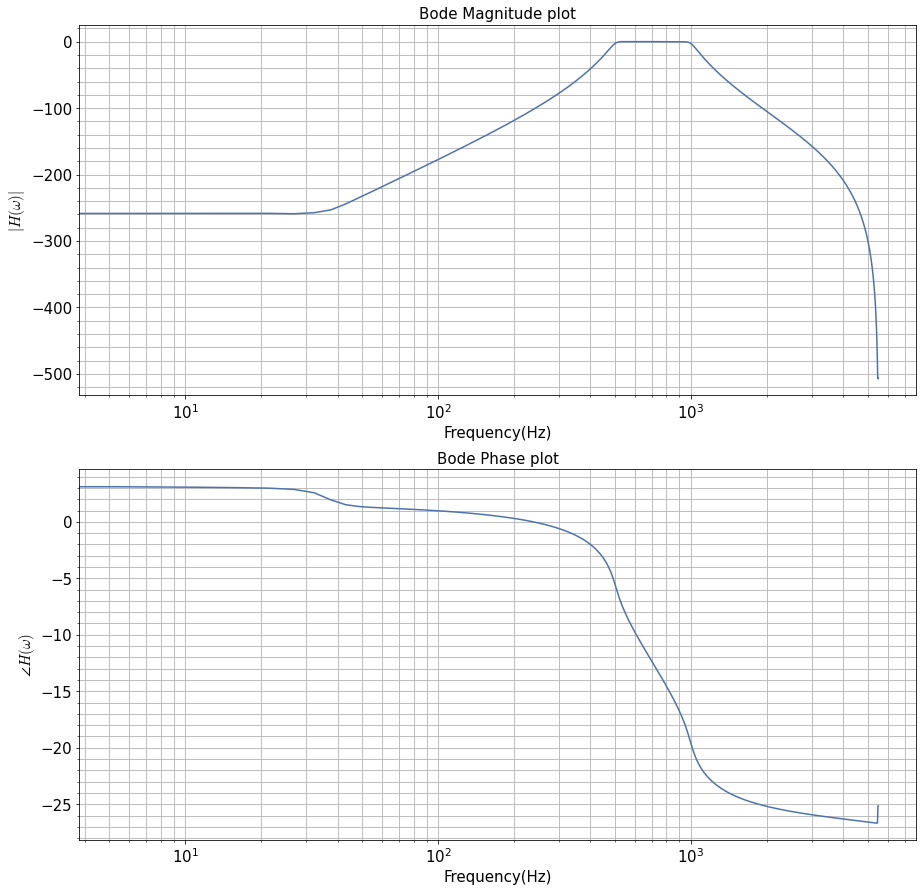

In [22]:
freq, mag = sp.freqz(num, den, 1024)
fig, axs = plt.subplots(2, figsize = (15,15))
title = ['$Bode\ Magnitude\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$', '$Bode\ Phase\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$']
    
plot_bode(freq,mag,title = "Bode Magnitude plot", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)

plt.savefig("Experiment-6/Results/Bode_bandpass")

In [23]:
track_filtered = sp.lfilter(num, den, track)
wavfile.write("Experiment-6/Results/filtered_track.wav", Fs, track_filtered)
IPython.display.Audio(track_filtered, rate = Fs)

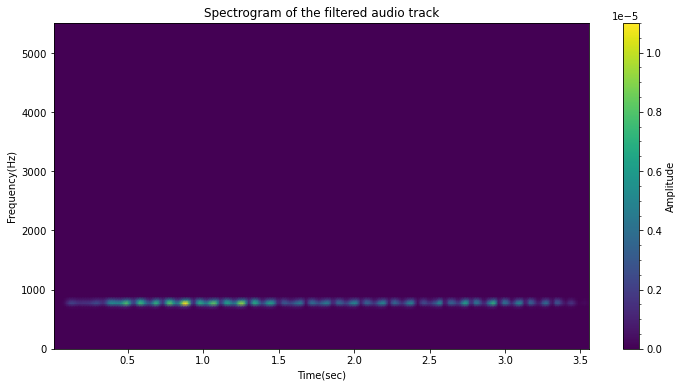

In [24]:
t,f,S = plot_spectro(track_filtered, Fs = Fs, Window = 'hanning',samples = None,Nperseg = 200,Noverlap = 10)
plt.title("Spectrogram of the filtered audio track")

plt.savefig("Experiment-6/Results/Spectro_filtered")

#### Problem 4

In [25]:
# Designing with same specifications using Type 1 Chebyshev filter
wp = 2*pi*10
ws = 2*pi*20

Pg = alpha
Ps = 40
Fs = 720

G = 10**(-2/20)                        #Pg = 20*log(base10)(G)
S = 10**(-40/20)                       #Ps = 20*log(base10)(S)
print("Passband gain: {}\nStopband gain: {}".format(G,S))

Passband gain: 0.7943282347242815
Stopband gain: 0.01


In [26]:
#Performing pre warping
omega_p=wp/Fs
omega_s=ws/Fs
Omega_p1=(2*Fs)*np.tan(omega_p/2)
Omega_s1=(2*Fs)*np.tan(omega_s/2)
print("Pre warped passband and stop band frequencies:{} rad/s and {} rad/s".format(Omega_p1,Omega_s1))

Pre warped passband and stop band frequencies:62.87175778825736 rad/s and 125.98367547733056 rad/s


In [27]:
N, Omega_c=sp.cheb1ord(Omega_p1, Omega_s1, Pg, Ps, analog=True)
n, d = sp.cheby1(N, Pg, Omega_c, btype='low', analog=True, output='ba')
nums, dens=sp.bilinear(n, d, fs=Fs)
print("Order of the filter:",N)
print("Cut off frequency:",Omega_c)

Order of the filter: 5
Cut off frequency: 62.87175778825736


In [28]:
print('H(z) = {}'.format(control.TransferFunction(n, d, dt=True)))

H(z) = 
                             8.028e+07
--------------------------------------------------------------------
z^5 + 44.42 z^4 + 5927 z^3 + 1.723e+05 z^2 + 7.177e+06 z + 8.028e+07



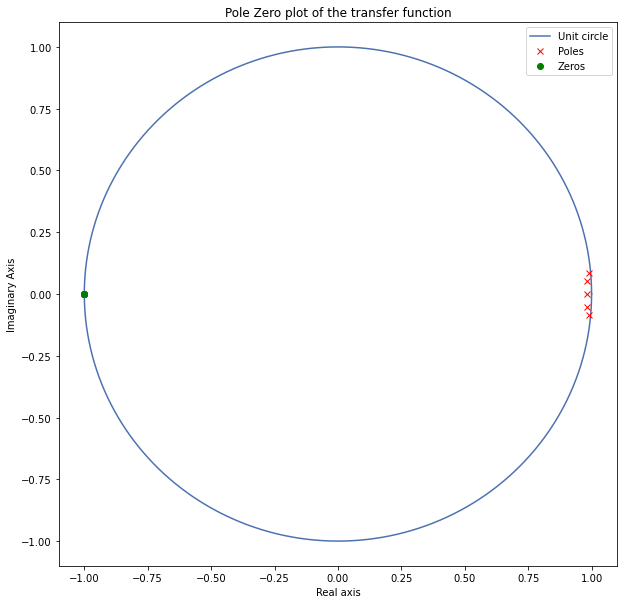

In [29]:
z,p,k = sp.cheby1(N, Pg,Omega_c, btype='low', analog=True, output='zpk')
zeros,poles,gain =sp.bilinear_zpk(z,p,k, fs=Fs)
theta = np.arange(0,2*pi, 0.0001)

plt.figure(figsize = (10,10))
pole_zero_plot(poles, zeros)
plt.savefig('Experiment-6/Results/zpk_plot_cheby.png')

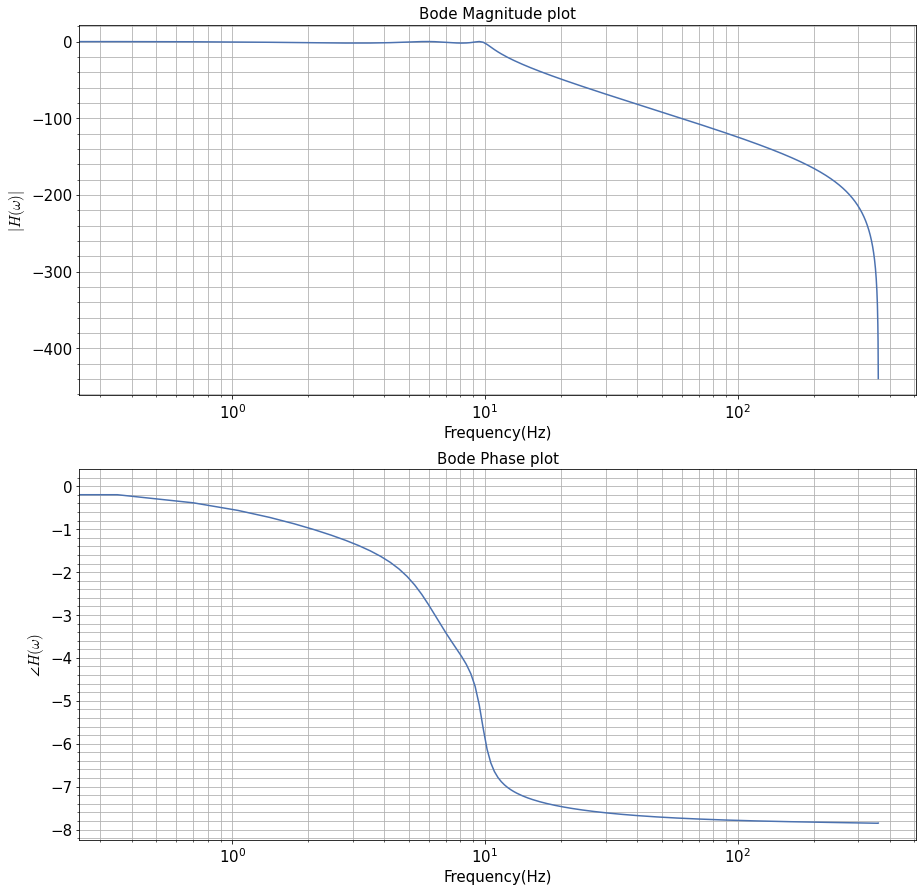

In [30]:
freq, mag = sp.freqz(nums, dens, 1024)
fig, axs = plt.subplots(2, figsize = (15,15))
title = ['$Bode\ Magnitude\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$', '$Bode\ Phase\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$']
    
plot_bode(freq,mag,title = "Bode Magnitude plot", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)

plt.savefig("Experiment-6/Results/Bode_cheby")

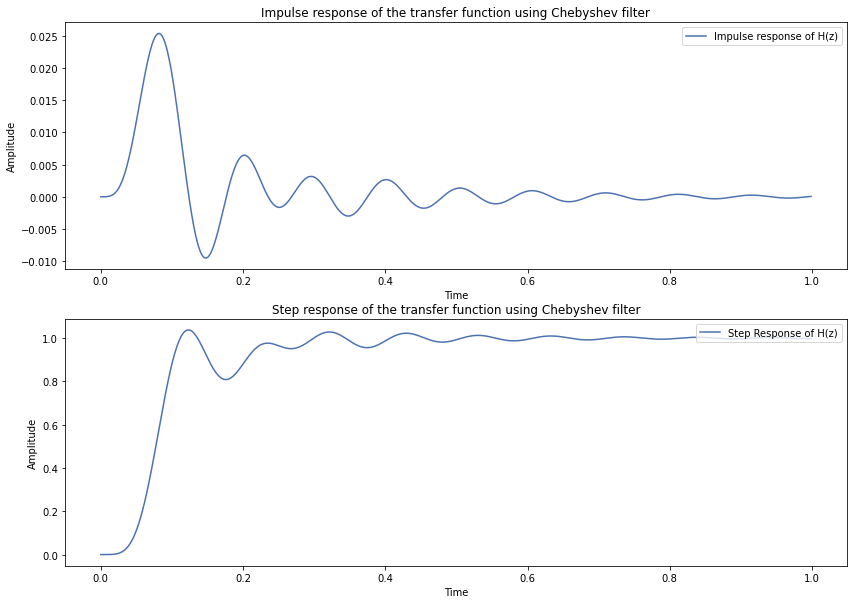

In [31]:
t = np.arange(0, 1, 1/Fs)
impulse = np.hstack((np.array([1]),np.zeros(Fs - 1)))
step = np.ones((Fs))

y1=sp.lfilter(nums, dens, impulse)
y2=sp.lfilter(nums, dens, step)

plt.figure(figsize= (14,10))
plt.subplot(2,1,1)
plt.plot(t,y1,label = "Impulse response of H(z)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper right')
plt.title("Impulse response of the transfer function using Chebyshev filter")

plt.subplot(2,1,2)
plt.plot(t,y2,label = "Step Response of H(z)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper right')
plt.title("Step response of the transfer function using Chebyshev filter")

plt.savefig("Experiment-6/Results/ISresponse_cheby")